In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df=pd.read_excel('C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/Estados/Caracteristicas_estados.xlsx')
df2=df[df['Estado']!='Ciudad de México']
df2=df2[df['Estado']!='México']
df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Estado,poblacion,pib_18,pib_mineria,pib_ajustado,pib_pc_18,pib_turismo,turismo_pct,turismo_adj,dens_pob_15,...,hogares,carencia_salud,salud_pct,escolaridad,tasa_informal,letalidad,mortalidad,contagios,probit1,probit
0,Aguascalientes,1312544,224807,691,224116,170749.323451,4396,0.019555,0.019615,233.700000,...,9017,1035,0.114783,9.725975,41.271800,0.062754,14.094766,224.601994,-0.057600,-0.05620
1,Baja California,3315766,565895,571,565324,170495.746684,11138,0.019682,0.019702,46.400000,...,11413,1886,0.165250,9.757418,37.330300,0.203266,67.948100,334.281732,0.045800,0.04570
2,Baja California Sur,712029,173047,4887,168160,236170.155991,23710,0.137015,0.140997,9.600000,...,7756,834,0.107530,9.905535,38.731200,0.042083,14.184816,337.064923,-0.053100,-0.06140
3,Campeche,899931,529584,420086,109498,121673.772767,4107,0.007755,0.037508,15.600000,...,6799,792,0.116488,9.138454,62.957800,0.094537,32.113573,339.692710,-0.013100,-0.01470
4,Coahuila de Zaragoza,2954915,609051,13718,595333,201472.123564,6710,0.011017,0.011271,19.500000,...,11582,1557,0.134433,9.897388,34.784600,0.050007,12.183092,243.627989,-0.065700,-0.06780
5,Colima,711235,104475,1660,102815,144558.408965,3354,0.032103,0.032622,126.400000,...,9265,964,0.104047,9.528720,52.008100,0.115594,14.903654,128.930663,-0.005200,-0.00780
6,Chiapas,5217908,271621,5435,266186,51013.931254,5928,0.021825,0.022270,71.200000,...,7207,1261,0.174969,7.288581,71.800500,0.147838,14.220258,96.187974,0.001200,0.00620
7,Chihuahua,3556574,562599,24019,538580,151432.249125,7851,0.013955,0.014577,14.400000,...,12518,1411,0.112718,9.466591,36.912900,0.190789,20.384786,106.844396,0.050700,0.04710
9,Durango,1754754,202547,8204,194343,110752.276387,2739,0.013523,0.014094,14.200000,...,8440,1106,0.131043,9.147610,52.274000,0.066838,10.371824,155.178447,-0.042300,-0.04170
10,Guanajuato,5853677,712902,2998,709904,121274.884145,13335,0.018705,0.018784,191.300000,...,10539,1393,0.132176,8.381851,53.859800,0.047252,9.942469,210.414753,-0.074800,-0.07270


In [3]:
ye=['letalidad','mortalidad','contagios','probit']
equis=['pib_pc_18','edad_mediana_15','10_muertes_dias','dens_pob_15','camas_100mil','escolaridad']

for i in range(len(equis)):
    df2['ln_'+equis[i]]=np.log(df2[equis[i]])

In [4]:
equis2=['ln_pib_pc_18','ln_edad_mediana_15','ln_10_muertes_dias','ln_dens_pob_15','ln_camas_100mil','ln_escolaridad']
X=np.log(df2[equis2])
X['pob_urbana']=df2['pob_urbana']
X['pobre_pct']=df2['pobre_pct']
X['salud_pct']=df2['salud_pct']
X['turismo_adj']=df2['turismo_adj']
X['tasa_informal']=df2['tasa_informal']/100
X['ln_10_muertes_dias_2']=df2['ln_10_muertes_dias']**2
X['ln_10_muertes_dias_3']=df2['ln_10_muertes_dias']**3
X = sm.add_constant(X)


In [5]:
y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     1.470
Date:                Tue, 21 Jul 2020   Prob (F-statistic):              0.225
Time:                        16:34:21   Log-Likelihood:                 72.511
No. Observations:                  31   AIC:                            -117.0
Df Residuals:                      17   BIC:                            -96.95
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.4852     75.489      0.046      0.964    -155.783     162.754
ln_pib_pc_18            -0.9631      0.567     -1.698      0.108      -2.160       0.234
ln_edad_mediana_15       0.5149      0.596      0.863      0.400      -0.743       1.773
ln_10_muertes_dias       0.4278    118.916      0.004      0.997    -250.463     251.318
ln_dens_pob_15           0.0223      0.028      0.790      0.440      -0.037       0.082
ln_camas_100mil          0.0785      0.163      0.483      0.636      -0.265       0.422
ln_escolaridad           0.3285      0.445      0.739      0.470      -0.609       1.266
pob_urbana              -0.0553      0.096     -0.576      0.572      -0.258       0.147
pobre_pct                0.0270      0.135      0.201      0.843      -0.257       0.311
salud_pct               -0.0705      0.363     -0.194      0.848      -0.837       0.696
turismo_adj              0.1363      0.141      0.967      0.347      -0.161       0.434
tasa_informal           -0.0608      0.139     -0.437      0.668      -0.355       0.233
ln_10_muertes_dias_2    -0.4267      9.433     -0.045      0.964     -20.328      19.475
ln_10_muertes_dias_3     0.0650      0.963      0.067      0.947      -1.967       2.097
==============================================================================
Omnibus:                        2.633   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.425
Skew:                           0.463   Prob(JB):                        0.490
Kurtosis:                       3.495   Cond. No.                     2.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
X=X.drop(columns='ln_10_muertes_dias')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     1.686
Date:                Tue, 21 Jul 2020   Prob (F-statistic):              0.153
Time:                        16:34:22   Log-Likelihood:                 72.511
No. Observations:                  31   AIC:                            -119.0
Df Residuals:                      18   BIC:                            -100.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7567      2.110      1.780      0.092      -0.677       8.190
ln_pib_pc_18            -0.9629      0.550     -1.751      0.097      -2.118       0.192
ln_edad_mediana_15       0.5147      0.577      0.892      0.384      -0.698       1.727
ln_dens_pob_15           0.0223      0.027      0.813      0.427      -0.035       0.080
ln_camas_100mil          0.0784      0.158      0.498      0.625      -0.253       0.409
ln_escolaridad           0.3291      0.393      0.836      0.414      -0.498       1.156
pob_urbana              -0.0554      0.087     -0.634      0.534      -0.239       0.128
pobre_pct                0.0272      0.122      0.222      0.827      -0.230       0.284
salud_pct               -0.0701      0.336     -0.209      0.837      -0.776       0.636
turismo_adj              0.1363      0.137      0.996      0.333      -0.151       0.424
tasa_informal           -0.0610      0.128     -0.475      0.640      -0.331       0.209
ln_10_muertes_dias_2    -0.3928      0.256     -1.533      0.143      -0.931       0.146
ln_10_muertes_dias_3     0.0615      0.039      1.575      0.133      -0.021       0.144
==============================================================================
Omnibus:                        2.630   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.422
Skew:                           0.463   Prob(JB):                        0.491
Kurtosis:                       3.495   Cond. No.                     3.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
X=X.drop(columns='salud_pct')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     1.933
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0998
Time:                        16:34:22   Log-Likelihood:                 72.473
No. Observations:                  31   AIC:                            -120.9
Df Residuals:                      19   BIC:                            -103.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.6369      1.979      1.838      0.082      -0.505       7.778
ln_pib_pc_18            -0.9545      0.534     -1.786      0.090      -2.073       0.164
ln_edad_mediana_15       0.5317      0.557      0.955      0.352      -0.633       1.697
ln_dens_pob_15           0.0203      0.025      0.811      0.428      -0.032       0.073
ln_camas_100mil          0.0787      0.154      0.513      0.614      -0.243       0.400
ln_escolaridad           0.3701      0.332      1.114      0.279      -0.326       1.066
pob_urbana              -0.0633      0.077     -0.824      0.420      -0.224       0.097
pobre_pct                0.0332      0.116      0.286      0.778      -0.209       0.276
turismo_adj              0.1381      0.133      1.037      0.313      -0.141       0.417
tasa_informal           -0.0669      0.122     -0.548      0.590      -0.322       0.189
ln_10_muertes_dias_2    -0.3836      0.246     -1.559      0.135      -0.899       0.131
ln_10_muertes_dias_3     0.0600      0.037      1.605      0.125      -0.018       0.138
==============================================================================
Omnibus:                        2.796   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.580
Skew:                           0.502   Prob(JB):                        0.454
Kurtosis:                       3.463   Cond. No.                     3.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
X=X.drop(columns='pobre_pct')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     2.220
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0619
Time:                        16:34:22   Log-Likelihood:                 72.407
No. Observations:                  31   AIC:                            -122.8
Df Residuals:                      20   BIC:                            -107.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.8804      1.745      2.224      0.038       0.240       7.521
ln_pib_pc_18            -1.0034      0.495     -2.029      0.056      -2.035       0.028
ln_edad_mediana_15       0.5353      0.544      0.985      0.337      -0.599       1.669
ln_dens_pob_15           0.0208      0.024      0.851      0.405      -0.030       0.072
ln_camas_100mil          0.0694      0.147      0.474      0.641      -0.236       0.375
ln_escolaridad           0.3398      0.308      1.104      0.283      -0.302       0.982
pob_urbana              -0.0633      0.075     -0.843      0.409      -0.220       0.093
turismo_adj              0.1361      0.130      1.048      0.307      -0.135       0.407
tasa_informal           -0.0516      0.107     -0.481      0.635      -0.275       0.172
ln_10_muertes_dias_2    -0.3972      0.236     -1.684      0.108      -0.889       0.095
ln_10_muertes_dias_3     0.0621      0.036      1.734      0.098      -0.013       0.137
==============================================================================
Omnibus:                        2.824   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                1.582
Skew:                           0.494   Prob(JB):                        0.454
Kurtosis:                       3.497   Cond. No.                     3.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
X=X.drop(columns='tasa_informal')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     2.534
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0381
Time:                        16:34:22   Log-Likelihood:                 72.228
No. Observations:                  31   AIC:                            -124.5
Df Residuals:                      21   BIC:                            -110.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.6908      1.669      2.212      0.038       0.220       7.161
ln_pib_pc_18            -0.8355      0.344     -2.428      0.024      -1.551      -0.120
ln_edad_mediana_15       0.4291      0.488      0.880      0.389      -0.585       1.443
ln_dens_pob_15           0.0156      0.021      0.724      0.477      -0.029       0.060
ln_camas_100mil          0.0471      0.136      0.345      0.734      -0.237       0.331
ln_escolaridad           0.3692      0.296      1.247      0.226      -0.247       0.985
pob_urbana              -0.0552      0.072     -0.769      0.451      -0.204       0.094
turismo_adj              0.1158      0.121      0.961      0.348      -0.135       0.367
ln_10_muertes_dias_2    -0.4143      0.229     -1.811      0.084      -0.890       0.061
ln_10_muertes_dias_3     0.0646      0.035      1.861      0.077      -0.008       0.137
==============================================================================
Omnibus:                        5.008   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                3.360
Skew:                           0.687   Prob(JB):                        0.186
Kurtosis:                       3.845   Cond. No.                     2.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
X=X.drop(columns='ln_camas_100mil')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     2.954
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0210
Time:                        16:34:22   Log-Likelihood:                 72.140
No. Observations:                  31   AIC:                            -126.3
Df Residuals:                      22   BIC:                            -113.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7618      1.622      2.319      0.030       0.397       7.127
ln_pib_pc_18            -0.8273      0.336     -2.460      0.022      -1.525      -0.130
ln_edad_mediana_15       0.4668      0.466      1.002      0.327      -0.499       1.433
ln_dens_pob_15           0.0150      0.021      0.717      0.481      -0.028       0.059
ln_escolaridad           0.3829      0.287      1.332      0.197      -0.213       0.979
pob_urbana              -0.0528      0.070     -0.754      0.459      -0.198       0.092
turismo_adj              0.1186      0.118      1.006      0.326      -0.126       0.363
ln_10_muertes_dias_2    -0.4249      0.222     -1.913      0.069      -0.886       0.036
ln_10_muertes_dias_3     0.0662      0.034      1.961      0.063      -0.004       0.136
==============================================================================
Omnibus:                        5.074   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                3.430
Skew:                           0.653   Prob(JB):                        0.180
Kurtosis:                       3.975   Cond. No.                     2.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X=X.drop(columns='ln_dens_pob_15')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     3.374
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0126
Time:                        16:34:22   Log-Likelihood:                 71.783
No. Observations:                  31   AIC:                            -127.6
Df Residuals:                      23   BIC:                            -116.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.1194      1.527      2.697      0.013       0.960       7.279
ln_pib_pc_18            -0.8687      0.328     -2.650      0.014      -1.547      -0.191
ln_edad_mediana_15       0.4780      0.461      1.038      0.310      -0.475       1.431
ln_escolaridad           0.3786      0.284      1.331      0.196      -0.210       0.967
pob_urbana              -0.0478      0.069     -0.694      0.495      -0.190       0.095
turismo_adj              0.0968      0.113      0.859      0.399      -0.136       0.330
ln_10_muertes_dias_2    -0.4641      0.213     -2.179      0.040      -0.905      -0.023
ln_10_muertes_dias_3     0.0722      0.032      2.231      0.036       0.005       0.139
==============================================================================
Omnibus:                        5.647   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.074
Skew:                           0.647   Prob(JB):                        0.130
Kurtosis:                       4.216   Cond. No.                     2.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X=X.drop(columns='pob_urbana')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     3.941
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00698
Time:                        16:34:23   Log-Likelihood:                 71.462
No. Observations:                  31   AIC:                            -128.9
Df Residuals:                      24   BIC:                            -118.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.1559      1.510      2.752      0.011       1.040       7.272
ln_pib_pc_18            -0.9455      0.305     -3.098      0.005      -1.575      -0.316
ln_edad_mediana_15       0.4410      0.452      0.975      0.339      -0.493       1.375
ln_escolaridad           0.3187      0.268      1.189      0.246      -0.234       0.872
turismo_adj              0.0961      0.111      0.862      0.397      -0.134       0.326
ln_10_muertes_dias_2    -0.4307      0.205     -2.099      0.047      -0.854      -0.007
ln_10_muertes_dias_3     0.0670      0.031      2.152      0.042       0.003       0.131
==============================================================================
Omnibus:                        8.325   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.348
Skew:                           0.811   Prob(JB):                       0.0254
Kurtosis:                       4.748   Cond. No.                     2.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X=X.drop(columns='turismo_adj')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     4.628
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00398
Time:                        16:34:23   Log-Likelihood:                 70.989
No. Observations:                  31   AIC:                            -130.0
Df Residuals:                      25   BIC:                            -121.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.1547      1.502      2.766      0.011       1.061       7.248
ln_pib_pc_18            -0.9052      0.300     -3.017      0.006      -1.523      -0.287
ln_edad_mediana_15       0.3485      0.437      0.797      0.433      -0.552       1.249
ln_escolaridad           0.3202      0.267      1.201      0.241      -0.229       0.869
ln_10_muertes_dias_2    -0.4296      0.204     -2.104      0.046      -0.850      -0.009
ln_10_muertes_dias_3     0.0670      0.031      2.161      0.040       0.003       0.131
==============================================================================
Omnibus:                        5.723   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                4.303
Skew:                           0.604   Prob(JB):                        0.116
Kurtosis:                       4.368   Cond. No.                     2.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X=X.drop(columns='ln_edad_mediana_15')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     5.707
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00196
Time:                        16:34:23   Log-Likelihood:                 70.600
No. Observations:                  31   AIC:                            -131.2
Df Residuals:                      26   BIC:                            -124.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4831      1.434      3.126      0.004       1.535       7.431
ln_pib_pc_18            -0.8929      0.298     -3.001      0.006      -1.504      -0.281
ln_escolaridad           0.3840      0.252      1.521      0.140      -0.135       0.903
ln_10_muertes_dias_2    -0.4307      0.203     -2.125      0.043      -0.847      -0.014
ln_10_muertes_dias_3     0.0673      0.031      2.186      0.038       0.004       0.130
==============================================================================
Omnibus:                        3.714   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                2.323
Skew:                           0.405   Prob(JB):                        0.313
Kurtosis:                       4.068   Cond. No.                     2.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X=X.drop(columns='ln_escolaridad')

y=df2['probit']
model1 = sm.OLS(y, X).fit()
res1=model1.summary()
pred1=model1.predict(X)
res1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     6.521
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00184
Time:                        16:34:23   Log-Likelihood:                 69.280
No. Observations:                  31   AIC:                            -130.6
Df Residuals:                      27   BIC:                            -124.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2413      1.460      2.906      0.007       1.246       7.236
ln_pib_pc_18            -0.5072      0.159     -3.184      0.004      -0.834      -0.180
ln_10_muertes_dias_2    -0.4943      0.203     -2.433      0.022      -0.911      -0.078
ln_10_muertes_dias_3     0.0769      0.031      2.496      0.019       0.014       0.140
==============================================================================
Omnibus:                        2.024   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                0.893
Skew:                           0.126   Prob(JB):                        0.640
Kurtosis:                       3.793   Cond. No.                     2.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

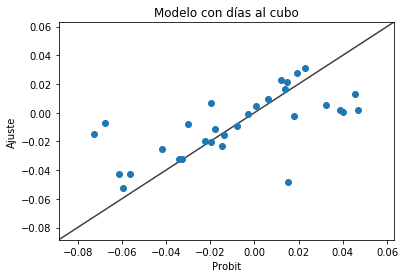

In [16]:
comparacion=pd.DataFrame(df2[['Estado','probit']])
comparacion['ajuste']=pred1

fig, ax = plt.subplots()
ax.scatter(comparacion['probit'],comparacion['ajuste'])

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
#ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.title('Modelo con días al cubo')
plt.ylabel('Ajuste')
plt.xlabel('Probit')
plt.show()



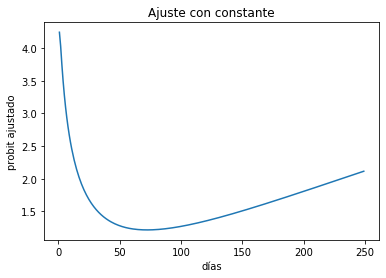

In [17]:
coef=pd.DataFrame(model1.params)

ln_dias=np.log(range(1,250))
ln_dias2=ln_dias**2
ln_dias3=ln_dias**3
probit_adj=(coef.iloc[0,0]) + (coef.iloc[2,0]*ln_dias2) + (coef.iloc[3,0]*ln_dias3)

plt.plot(range(1,250),probit_adj)
plt.xlabel('días')
plt.ylabel('probit ajustado')
plt.title('Ajuste con constante')
plt.show()